In [37]:
import numpy as np
def random_with_column(v):
    n = len(v)
    # Start with v as the first column of the matrix
    Q = np.zeros((n, n), dtype=np.complex128)
    Q[:, 0] = v

    # Fill with random complex vectors
    for i in range(1, n):
        rand_vec = np.random.randn(n) + 1j * np.random.randn(n)
        # Orthogonalize against previous vectors
        for j in range(i):
            rand_vec -= np.vdot(Q[:, j], rand_vec) * Q[:, j]
        # Normalize
        rand_vec /= np.linalg.norm(rand_vec)
        Q[:, i] = rand_vec

    return Q


In [38]:
def normalize(v):
    """
    Normalize a complex vector.
    """
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

In [39]:
ress = np.zeros((100, 4), dtype=np.complex128)

fixed_col1 = normalize(np.array([1, 2, 4, 1], dtype=np.complex128))
fixed_col2 = normalize(np.array([0, 1, 2, 10], dtype=np.complex128))
ket_00 = np.array([1, 0, 0, 0], dtype=np.complex128)

for i in range(100):
    np.random.seed(i)
    m1 = random_with_column(fixed_col1)
    m2 = random_with_column(fixed_col2)
    U_result = m2.conjugate().T @ m1
    ress[i] = U_result @ ket_00  # U |00⟩



In [42]:
ress[:,0]

array([0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
       0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j, 0.41612519+0.j,
      

In [43]:
ress[:,1]

array([-0.00169093-2.76245432e-01j,  0.01005906+2.22921374e-01j,
       -0.24933079+5.85050170e-01j,  0.01186141+3.48824180e-02j,
        0.57658036+2.10428505e-01j,  0.39107537-4.49810692e-01j,
        0.36068184-3.28752476e-04j, -0.22841746+3.71586690e-01j,
       -0.14540295-3.87447330e-01j,  0.02806172+5.75073087e-01j,
        0.33850719-3.83882535e-02j,  0.71021629+2.69566192e-01j,
       -0.57836668+3.16391043e-01j, -0.41394415+1.11968225e-01j,
        0.02175162+5.23170744e-01j, -0.51256698+8.23764736e-02j,
        0.48848448+5.07743128e-01j, -0.55665389-3.86357505e-01j,
       -0.34885653-7.59397316e-01j,  0.35319365-4.33649922e-01j,
       -0.22955426+5.85337529e-01j,  0.04981428-5.35022849e-01j,
        0.18965418-6.48905554e-01j, -0.30649878-2.61922778e-01j,
        0.11039478-4.88482586e-02j, -0.18351765-3.44460342e-01j,
        0.4331446 -6.12590239e-01j,  0.22621892+3.35132472e-01j,
       -0.18224353+4.23458689e-01j,  0.48400558-3.71573175e-01j,
        0.29468217+2.4883

/tmp/ipykernel_3634/2385383779.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([real_parts[:, i] for i in range(4)], labels=labels)
/tmp/ipykernel_3634/2385383779.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([imag_parts[:, i] for i in range(4)], labels=labels)


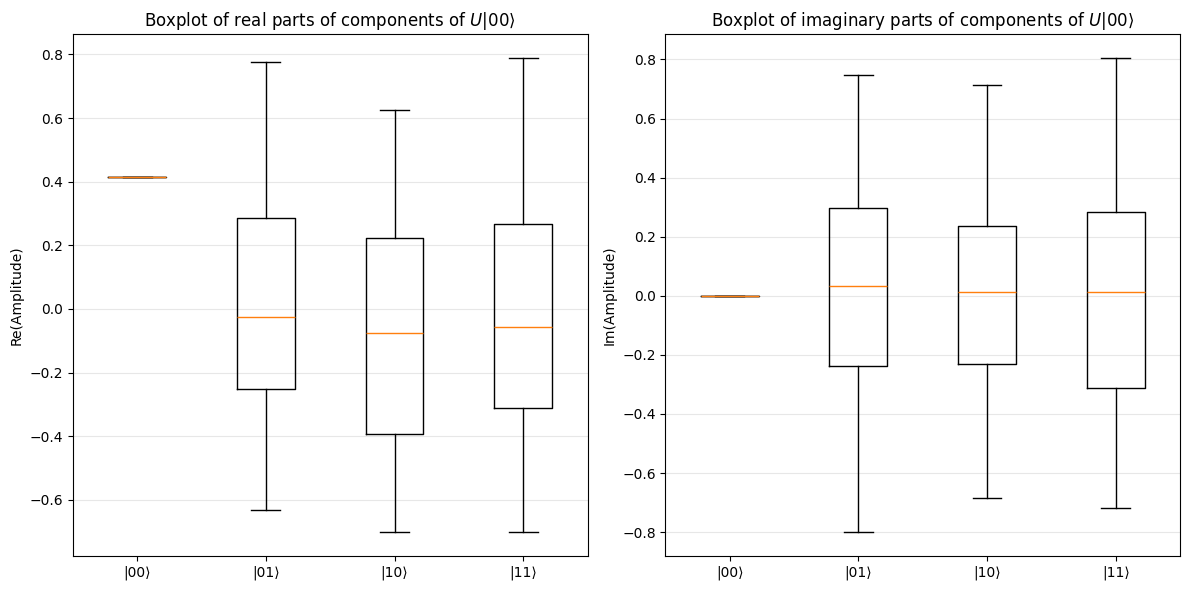

In [45]:
import matplotlib.pyplot as plt

labels = ["|00⟩", "|01⟩", "|10⟩", "|11⟩"]

# Extract real and imaginary parts
real_parts = ress.real  # shape: (100, 4)
imag_parts = ress.imag

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Real part boxplot
axs[0].boxplot([real_parts[:, i] for i in range(4)], labels=labels)
axs[0].set_title("Boxplot of real parts of components of $U|00⟩$")
axs[0].set_ylabel("Re(Amplitude)")
axs[0].grid(True, axis='y', alpha=0.3)

# Imaginary part boxplot
axs[1].boxplot([imag_parts[:, i] for i in range(4)], labels=labels)
axs[1].set_title("Boxplot of imaginary parts of components of $U|00⟩$")
axs[1].set_ylabel("Im(Amplitude)")
axs[1].grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

